# Pymaceuticals Inc.
---

### Analysis

- Observation 1: There is a strong correlation (.84) and close relationship (as shown by the linear regression) between mouse weight and tumor volume. That is, mice with greater mass showed larger tumor volume.

- Observation 2: The line plot "Measurements for Mouse b128 Treated with Capomulin" shows that over time, Capomulin treatments resulted in smaller tumor volume in Mouse b128.

- Observation 3: The bar graphs "Timepoints per Regimen" indicate that Capomulin and Ramicane had substantially more timepoints than other treatments. This may result in more complete and comprehensive data results than other treatments that used fewer timepoints.
 

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [66]:
# Checking the number of mice
combined_df["Mouse ID"].nunique()

249

In [88]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# alternative using .loc
# duplicates = combined_df.loc['Mouse ID']['Timepoints']

# Xpert Learning Assistant
duplicates = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get all the data for the duplicate mouse ID.
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [69]:
# Checking the number of mice in the clean DataFrame. 

clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
# Supported with Xpert Learning Assistant

grouped_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({
            "Mean Tumor Volume": grouped_df.mean(),
            "Median Tumor Volume": grouped_df.median(),
            "Tumor Volume Variance": grouped_df.var(),
            "Tumor Volume Std Dev": grouped_df.std(),
            "Tumor Volume Std Err": grouped_df.sem()
            })
                   
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

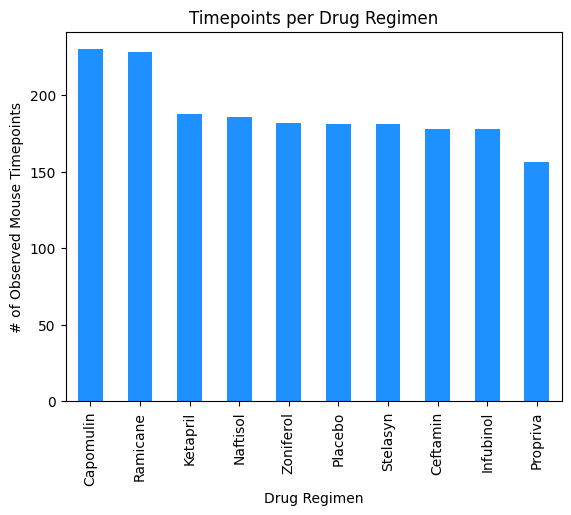

In [87]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Split data into groups based on drug regimen
drug_regimen = clean_df.groupby('Drug Regimen')

# Find out how many timepoints per drug regimen
timepoints = drug_regimen['Timepoint'].count()

# Organize timepoints 
# Xpert Learning Assistant helped correct code error
timepoints_sorted = timepoints.sort_values(ascending=False)

#Chart Data
timepoint_chart = timepoints_sorted.plot(kind="bar", title="Timepoints per Drug Regimen",  color='DodgerBlue')
timepoint_chart.set_xlabel("Drug Regimen")
timepoint_chart.set_ylabel("# of Observed Mouse Timepoints")

plt.show()

<BarContainer object of 10 artists>

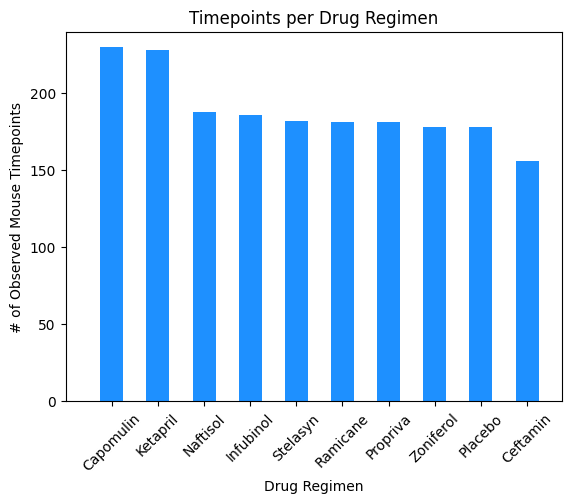

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Using variables created for previous bar graph
# drug_regimen = clean_df.groupby('Drug Regimen')
# timepoints = drug_regimen['Timepoint'].count()
# timepoints_sorted = timepoints.sort_values(ascending=False)

# create variables for plt.bar function
x_axis = np.arange(len(drug_regimen))
tick_locations = [value for value in x_axis]
labels = clean_df["Drug Regimen"].unique()

# create xticks
plt.xticks(tick_locations, labels=labels, rotation=45)

# set chart limits
plt.xlim(-1, len(x_axis)-.25)
plt.ylim(0, 240)

# create title and labels
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.bar(x_axis, timepoints_sorted, color='DodgerBlue', align='center', width=0.5)


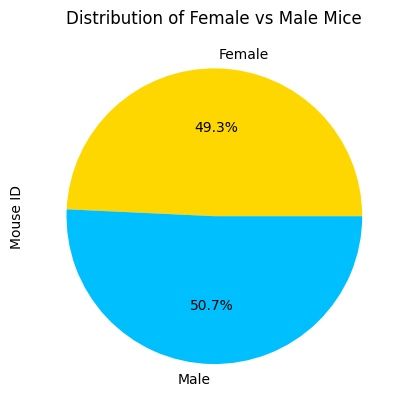

In [74]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# Xpert Learning Assistant showed me how to efficiently combine two rows of code I had previously made
gender_group = clean_df.groupby('Sex')['Mouse ID'].count()

# Make the pie chart
#Chart Data
colors=["gold", "DeepSkyBlue"]
distribution = gender_group.plot(kind="pie", title="Distribution of Female vs Male Mice", colors=colors, autopct="%1.1f%%")

plt.show()

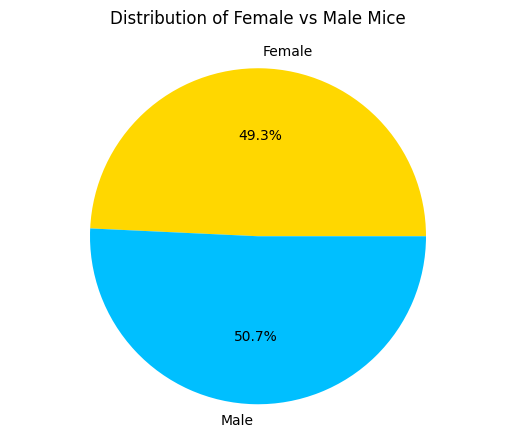

In [75]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# using variable from previous pie chart
# gender_group = clean_df.groupby('Sex')['Mouse ID'].count()

# create variables for plt.bar function
# Xpert Learning Assistant helped me to debug and fix some errors with my labels and counts

# get gender labels (female, male)
genders = gender_group.index

# get gender counts
gender_count = gender_group.values

colors = ["gold", "DeepSkyBlue"]

# Make the pie chart
plt.title("Distribution of Female vs Male Mice", pad=20)

plt.pie(gender_count, labels = genders, colors=colors,  autopct="%1.1f%%", startangle=360)
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [76]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Xpert Assistant helped me to correct the merge on=['Mouse ID', 'Timepoint']
final_tumor_volume_df = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'])
final_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [77]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
# Xpert Learning Assistant recommended a dictionary instead of a list so treatments could be stored as keys
tumor_vol_data = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# calculate quartiles for each treatment separately

for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Xpert Learning Assistant helped me to identify necessary variables, 
    # provided the boolean operation == treatement, and the correct function to add to the dictionary

    # match treatment in treatments list as a key 
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]

    # collect the volume as a value that corresponds to each treatement
    final_volumes = treatment_data['Tumor Volume (mm3)']

    # add the resulting final tumor volumes for each drug to the empty list
    tumor_vol_data[treatment] = final_volumes.tolist()

    # add subset
    # Xpert Learning Assistant provided this code
    final_volumes_series = pd.Series(final_volumes)

    # Determine outliers using upper and lower bounds
    quartiles = final_volumes_series.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    #print(f"{treatment} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Identify potential outliers
    outliers = final_volumes_series[(final_volumes_series < lower_bound) | (final_volumes_series > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers.tolist()}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


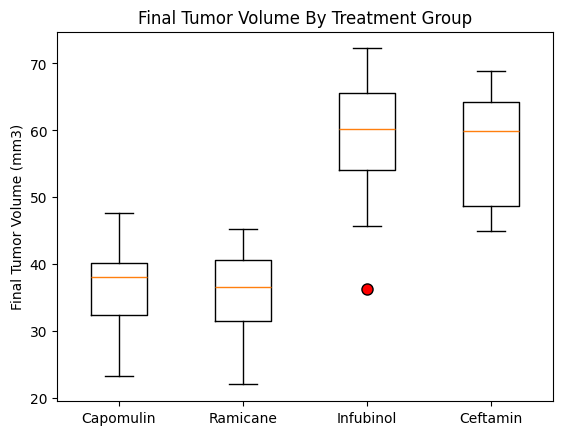

In [78]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Convert the tumor_vol_data dictionary to a DataFrame
# Xpert Assistant suggestion
tumor_vol_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in tumor_vol_data.items()]))

fig1, ax1 = plt.subplots()

ax1.set_title('Final Tumor Volume By Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3)')

ax1.boxplot(tumor_vol_df, tick_labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8, markeredgecolor='black'))
plt.show()

## Line and Scatter Plots

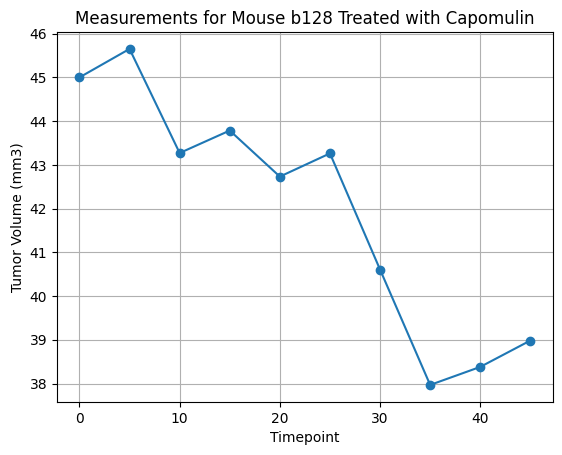

In [79]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# filter for Mouse b128 data
# Xpert Assistant provided the code framework which I modified for this data 
mouse_b128 = clean_df[clean_df["Mouse ID"] ==  'b128']

plt.plot(mouse_b128['Timepoint'], mouse_b128['Tumor Volume (mm3)'], marker='o')
plt.title(f'Measurements for Mouse b128 Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()

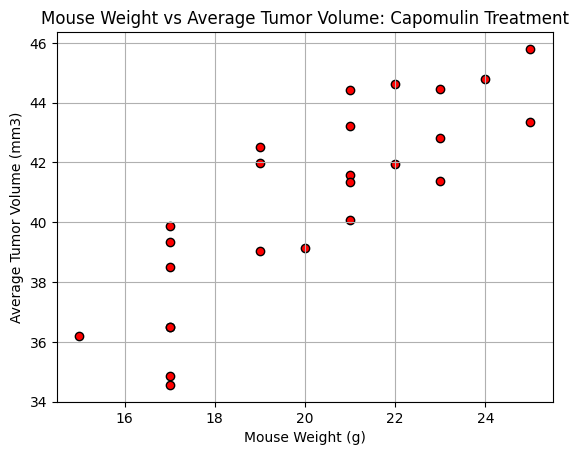

In [80]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_data = clean_df[clean_df["Drug Regimen"] == 'Capomulin']
mouse_data

#Xpert Assistant reminded me to use the groupby function to get the avg tumor volume for each mouse
avg_tumor_volume = mouse_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()
avg_tumor_volume

#Xpert Assistant recommended merging the tumor volume data back with my filtered-by-drug-regimen data
merged_mouse_data = mouse_data.groupby("Mouse ID")['Weight (g)'].first().reset_index()
merged_mouse_data = merged_mouse_data.merge(avg_tumor_volume, on="Mouse ID")

plt.scatter(merged_mouse_data['Weight (g)'], merged_mouse_data['Tumor Volume (mm3)'], marker="o", facecolors = "red", edgecolors = "black")
plt.title("Mouse Weight vs Average Tumor Volume: Capomulin Treatment")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
plt.show()

## Correlation and Regression

In [84]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#correlation coefficient
mouse_weight = merged_mouse_data['Weight (g)']
avg_tumor_volume = merged_mouse_data['Tumor Volume (mm3)']

correlation = st.pearsonr(mouse_weight, avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}.")

The correlation between both factors is 0.84.


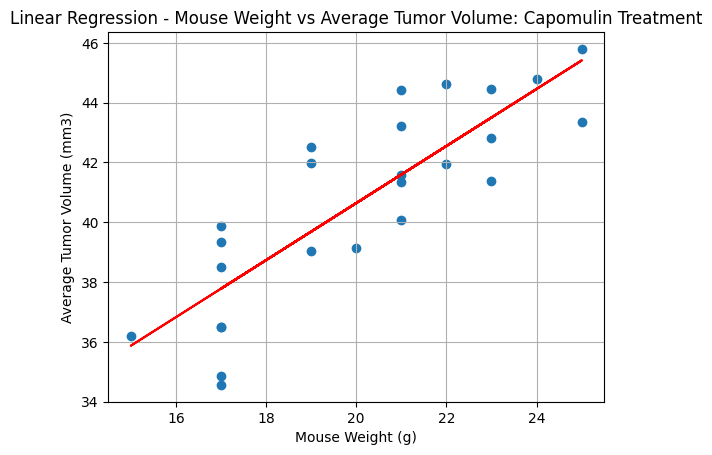

In [85]:
x_values = merged_mouse_data['Weight (g)']
y_values = merged_mouse_data['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Linear Regression - Mouse Weight vs Average Tumor Volume: Capomulin Treatment") 
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
plt.show()